HW - 4
Group : Kaleb, Jordan, Kato.

Test your network with different numbers of layers and neurons and present the best result found.

Describe the problem that you have chosen.

1. If possible, provide a link (kaggle?) with details on the problem/dataset.
2. What is the input? What is the output?
3. What type of problem is this?
4. What are the features or attributes that you will use from the dataset.
5. What is your evaluation metric? Accuracy? RMSE? MAE? Recall/Precision?

We created a dataset based on online information from yahoo finance using an API called yfinance. The stock information used was for Amazon from 01/01/2019 - 01/01/2020 The dataset contains 7 features: Date, Open, High, Low, Close, Adj Close, and Volume. The inputs used were Open, High, and Low. The output is the Close price of the stock. The problem is to predict the Close price of the stock based on the input features. This is a regression problem. The evaluation metric is RMSE.

# Creating the dataset


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pandas_datareader as data_reader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

yf.pdr_override()

In [3]:
df = pdr.get_data_yahoo("AMZN", start="2017-01-01", end="2020-01-01")

[*********************100%%**********************]  1 of 1 completed


In [4]:
dates = df.index
date = pd.to_datetime(df.index)

In [5]:
dates

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=754, freq=None)

Text(0.5, 1.0, 'Amazon Stock Closing Price')

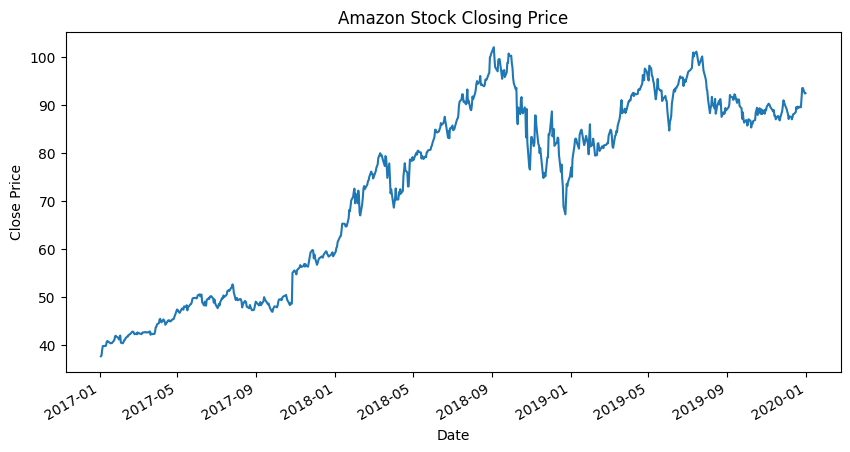

In [6]:
plt.figure(figsize=(10, 5))
df['Close'].plot()
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price')


# Splitting the dataset

In [7]:
y = df[['Close']]
X = df[['Open', 'High', 'Low']]

print(y[:5])
print(X[:5])

                Close
Date                 
2017-01-03  37.683498
2017-01-04  37.859001
2017-01-05  39.022499
2017-01-06  39.799500
2017-01-09  39.846001
                 Open       High        Low
Date                                       
2017-01-03  37.896000  37.938000  37.384998
2017-01-04  37.919498  37.984001  37.709999
2017-01-05  38.077499  39.119999  38.013000
2017-01-06  39.118000  39.972000  38.924000
2017-01-09  39.900002  40.088501  39.588501


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.49


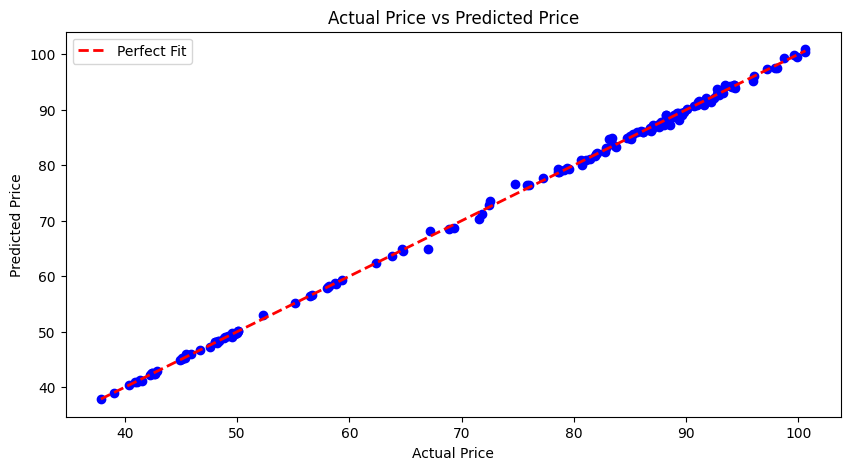

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Fit')

plt.legend()
plt.show()


In [10]:
import tensorflow as tf

2023-12-06 16:48:59.814458: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [12]:
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=200, verbose=0)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
predictions = model.predict(X_test)
accuracy = tf.keras.metrics.CategoricalAccuracy()(y_test, predictions).numpy()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("The root mean error:" rmse)

5/5 [==============================] - 0s 3ms/step
0.4862864342985311
